# Primeiro trabalho - Random Walk
Discente: Ábner Pereira

# Índice
- [Primeiro caso de teste](#scrollTo=U2HliHkUmg5R)
   - [Função objetivo](#scrollTo=fCgo39sIvVbN)
   - [Equação](#scrollTo=YnedX724ybG5)
   - [Faixas](#scrollTo=LVrSbF36yiJP)
   - [Funções](#scrollTo=E-91koMQmg5T)
   - [Execução](#scrollTo=FoGV4YIQqngS)
   - [Visualização](#scrollTo=dFoWZpfaGijG)
- [PSO](#scrollTo=U2HliHkUmg5R)

# Primeiro caso de teste

Nesta atividade será desenvolvido um Random Walk para achar o mínimo da [função objetivo](#scrollTo=fCgo39sIvVbN) abaixo . Usando uma distribuição uniforme para gerar uma população de sequências (x1, x2, e x3) de números reais variando de 0 a 1, convertidos respectivamente segundo as [faixas](#scrollTo=LVrSbF36yiJP) de x1, x2 e x3, sob a [Equação](#scrollTo=YnedX724ybG5) abaixo.

### Função objetivo

In [1]:
from IPython.display import display, Math, Latex
display(Math(r'Fun = 10 \times (x_1 - 1)^{2} + 20 \times (x_2 - 2)^{2} + 30 \times (x_3 - 3)^{2}'))

<IPython.core.display.Math object>

### Equação

In [2]:
display(Math(r"x_i'= LB_{x_i} + (UB{x_i} - LB{x_i}) \times valor_i"))

<IPython.core.display.Math object>

### Faixas

In [3]:
display(Math(r'LB_{x_1} = -3, UB_{x_1} = 3'))
display(Math(r'LB_{x_2} = -2, UB_{x_2} = 4'))
display(Math(r'LB_{x_3} = 0, UB_{x_3} = 6'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Funções

In [4]:
def populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores):
  #valores a aleatórios
  populacao = [[]]
  populacao = np.random.uniform(x_inf,x_sup,(qtd_seqs,qtd_valores))
  return populacao

In [5]:
def populacao_n(qtd_seqs, qtd_valores, populacao):
  lb = [-3, -2, 0] 
  ub = [3, 4, 6]
  #conversão nas faixas
  i = 0
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      # equação 1 em cada valor
      populacao[i][j] = lb[j] + (ub[j] - lb[j]) * populacao[i][j]
      j += 1
    i += 1
  return populacao

In [6]:
def float_2_point(qtd_seqs, qtd_valores, populacao):
  i = 0
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      # apresenta cada valor em float com 2 casas decimais
      populacao[i][j] = round(populacao[i][j], 2)
      j += 1
    i += 1
  return populacao

In [7]:
def funcao_obj(x1, x2, x3):
  y = 0
  y = 10 * (x1 - 1)**2 + 20 * (x2 - 2)**2 + 30 * (x3 - 3)**2
  return y

In [8]:
def resultado(qtd_seqs, qtd_valores, populacao):
  i = 0
  x = [0,0,0]
  y = []
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      x[j] = populacao[i][j]
      j += 1
    y.append(funcao_obj(x[0], x[1], x[2]))
    i += 1
  return y

### Execução

In [9]:
import numpy as np
import pandas as pd

In [10]:
#Entrada
x_inf = 0
x_sup = 1
qtd_seqs = 100
qtd_valores = 3
qtd_geracoes = 5000
qtd_execucoes = 20

df_populacao = pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhores indivíduos por geração
df_fitness =  pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhor fitness por geração
df_solucoes = pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhores resultados por execução do algoritmo
df_dispersao =  pd.DataFrame(None, columns=["mean", "std"]) #valores por  execução do algoritmo

In [11]:
i = 0
for i in range(qtd_execucoes):
  j = 0
  for j in range(qtd_geracoes):
    #Criando população com indivíduos aleatórios com valores entre X_INF e X_SUP convertendo-os às faixas
    if j == 0:
      populacao_final = []
      populacao_final = populacao_n(qtd_seqs, qtd_valores, populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores))
    else:
      populacao_final = []
      populacao_final = populacao_n(meio, qtd_valores, populacao_a(x_inf, x_sup, meio, qtd_valores))

    #Gerando resultado para cada indivíduo
    if j == 0:
      valores_r = []
      valores_r = resultado(qtd_seqs, qtd_valores, populacao_final)
    else:
      valores_r = []
      valores_r = resultado(meio, qtd_valores, populacao_final)
    
    #Guardando novos resultados no Data Frame
    df_pf = pd.DataFrame(populacao_final, columns=["x1", "x2", "x3"])
    df_pf["y"] = valores_r
    df_populacao = pd.concat([df_populacao, df_pf])
    
    #Ordenando indivíduos/resultados
    df_populacao.sort_values(by=["y"], inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)
    
    #Guardando melhor fitness da geração
    df_fitness = df_fitness.append(df_populacao.iloc[[0]], ignore_index=True)

    #Excluindo 50% piores indivíduos
    meio = int(len(df_populacao)/2)
    df_populacao.drop(df_populacao[df_populacao.index >= meio].index, inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)

    j += 1
    
  #Guardando melhor resultado de cada execucao
  df_solucoes = df_solucoes.append(df_populacao.iloc[[0]], ignore_index=True)

  #Calculando a média e desvio padrão entre os melhores fitness da execução
  df_dispersao = df_dispersao.append(df_fitness["y"].describe().loc[["mean", "std"]], ignore_index=True)

  i+=1

### Visualização

**Melhores resultados por geração**

In [12]:
df_fitness

,x1,x2,x3,y
0,0.084873,1.700468,3.480034,17.081943
1,1.202130,1.809231,3.432797,6.755807
2,1.003133,2.401535,3.035828,3.263211
3,1.003133,2.401535,3.035828,3.263211
4,1.003133,2.401535,3.035828,3.263211
...,...,...,...,...
99995,0.990862,1.993935,2.998269,0.001661
99996,0.990862,1.993935,2.998269,0.001661
99997,0.990862,1.993935,2.998269,0.001661
99998,0.990862,1.993935,2.998269,0.001661


**Melhores resultados por execução**

In [13]:
df_solucoes

,x1,x2,x3,y
0,0.966676,1.987543,2.952536,0.081793
1,1.000147,1.966336,2.996624,0.023008
2,1.000147,1.966336,2.996624,0.023008
3,1.000147,1.966336,2.996624,0.023008
4,1.000147,1.966336,2.996624,0.023008
5,1.000147,1.966336,2.996624,0.023008
6,1.000147,1.966336,2.996624,0.023008
7,1.000147,1.966336,2.996624,0.023008
8,1.000147,1.966336,2.996624,0.023008
9,1.000147,1.966336,2.996624,0.023008


**Média e desvio padrão dos fitness por execução**

In [14]:
df_dispersao

,mean,std
0,0.154392,0.308938
1,0.100674,0.225875
2,0.074785,0.188022
3,0.061841,0.164367
4,0.054074,0.147832
5,0.048897,0.135447
6,0.045198,0.125726
7,0.042424,0.117834
8,0.040267,0.111263
9,0.038541,0.105680


In [15]:
import matplotlib.pyplot as plt
import seaborn as sbn

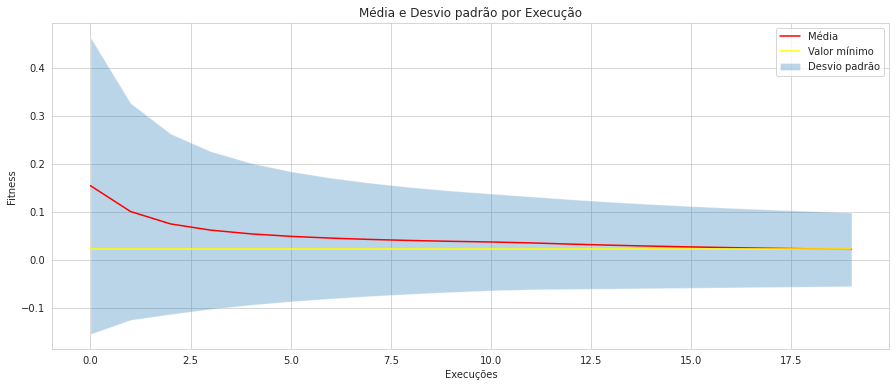

In [16]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"], label='Média', color="red")
plt.fill_between(range(len(df_dispersao)), df_dispersao["mean"]-df_dispersao["std"], df_dispersao["mean"]+df_dispersao["std"], alpha=0.3, label='Desvio padrão')
plt.plot(df_dispersao.index, [min(df_dispersao["mean"]) for i in range(len(df_dispersao.index))], label="Valor mínimo", color="yellow")
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Média e Desvio padrão por Execução")
plt.legend()
plt.show()

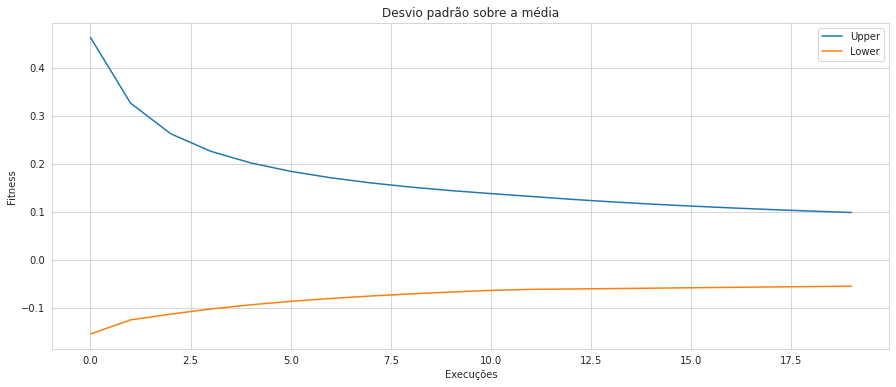

In [17]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"] + df_dispersao["std"], label='Upper')
plt.plot(df_dispersao.index, df_dispersao["mean"] - df_dispersao["std"], label='Lower')
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Desvio padrão sobre a média")
plt.legend()
plt.show()

> <p align="justify">Através dos resultados apresentados podemos observar que a população está convergindo à solução ótima (se pensarmos em minimização) neste algoritmo quando vemos que a média continua se aproximando de zero.<br>
Podemos ainda visualizar através do gráficos acima que o desvio padrão (máximo e mínimo) calculado sobre os melhores resultados selecionados um entre todas as populações por execução se aproxima cada vez mais da curva que representa a média sobre os mesmos resultados selecionados, porém ainda apresenta um valor elevado em comparação à média, nos deixando com uma baixa confiabilidade no algoritmo.</p>
